## Specializer Error

Ethan, I found a case where the labels aren't tracked correctly. In the first example they are tracked correctly and in the second example they aren't. In both cases I specialize two nodes. In the first case they are a part of the same strongly connected component and in the second case they are not.

I think you might have fixed this already since I'm using the code you pushed to my repo in the spring. If not, hopefully this helps isolate what is happening.

In [1]:
from sparse_specializer import *

### Specializer labels works here:

In [2]:
A = np.array([[0,1,1,1,1],
              [1,0,0,0,0],
              [1,1,0,0,1],
              [0,0,1,0,1],
              [0,0,0,1,0]
             ])

/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


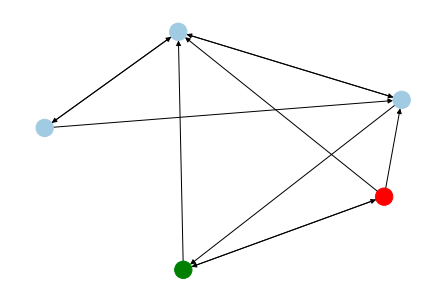

In [3]:
# Make graph
n = 5
G = nx.DiGraph(A.T)
best_nodes = [3,4]

# Make color map
colormap = ["#A0CBE2"] * n

COLORS = "grcmyk"
j= 0
for i in best_nodes:
    colormap[i] = COLORS[j]
    j+=1

nx.draw(G, node_color=colormap)
# end

/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


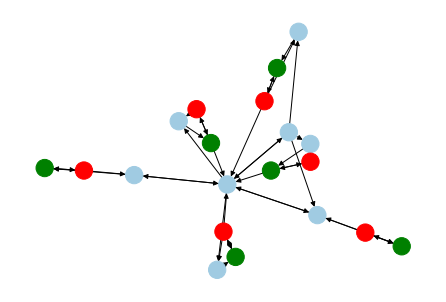

In [7]:
orig_colors = colormap
H = DirectedGraph(A,lambda x: x)
H.specialize([0,1])
S = H.A
n = S.shape[0]
G = nx.DiGraph(S.T.toarray())

# Make color map
colormap = ["#A0CBE2"] * n
for i in range(n):
    colormap[i] = orig_colors[H.origination(i)]
# end


nx.draw(G, node_color=colormap)
# end

### Specializer breaks

In [9]:
A = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])


In [10]:
i = 12
print("Node: {}".format(i))
print("In-degree: {}".format(A.sum(axis=1)[i]))
print("Out-degree: {}".format(A.sum(axis=0)[i]))

Node: 12
In-degree: 5
Out-degree: 2


In [11]:
j = 15
print("Node: {}".format(j))
print("In-degree: {}".format(A.sum(axis=1)[j]))
print("Out-degree: {}".format(A.sum(axis=0)[j]))

Node: 15
In-degree: 2
Out-degree: 2


In [12]:
print("Connections between the nodes")
A[[i,j]][:,[i,j]]

Connections between the nodes


array([[0, 0],
       [0, 0]])

Based on the above we would expect to get 14 specialized nodes added to the base set of 18 nodes. This is because nodes 12 and 15 are copied once for every combination of ingoing/outgoing edges.

Copies of 12 = 5*2 = 10

Copies of 15 = 2*2 = 4

This puts the total next nodes at 14. However, while the directed graph specialization produces a graph with 32 nodes as expected, it says that all of them came from node 15. The origination did work in smaller examples though.

In [13]:
nodes = [12,15]
G = DirectedGraph(A, lambda x: x)
base = [i for i in range(20)]
base.remove(12)
base.remove(15)
G.specialize(base)
print("Size of base: {}".format(len(base)))
print("Specialized size: {}".format(G.A.shape[0]))

IndexError: row index (32) out of range

In [14]:
origin = list(map(lambda x: G.origination(x), list(range(32))))
print("Origins of all new nodes")
print(origin[18:])

Origins of all new nodes
[12, 12, 12, 12, 12, 12, 12, 12, 15, 15, 12, 12, 15, 15]


It gets the origins right but doesn't build the matrix.